In [156]:
#
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
np.set_printoptions(suppress=True)
from glob import glob

## Таблицы, содержащие последовательности 16/18s rRNA (ОТЕ - long1 и их количество) из таблиц .v4 после ribotagger

In [167]:
#Путь до данных
path = '/Users/lolitiy/Documents/inst_bioinf_19_20/project/test'

#Имена для таблиц
sample_names = os.listdir(path)
sample_names = [x for x in sample_names if x.endswith('.v4') and not x.startswith('~')]

#Лист всех таблиц 
sample_files = glob('/Users/lolitiy/Documents/inst_bioinf_19_20/project/test/*v4')
list_of_dfs = [pd.read_csv(sample_file, skiprows=6, sep='\t', usecols=lambda c: c in {'long.total.count', 'long1'}, header=0).dropna() for sample_file in sample_files]
list_of_dfs

[     long.total.count                                              long1
 0                 164  TGCAGTTAAAAAGCTCGTAGTTGAAATTCTGGCTGTATTGGGCCTC...
 1                 487  TGGGCGTAAAGAGTGCACAGGTGGTTATATAAGTTTGGTGTTAAAT...
 2                  82  TGCAGTTAAAAAGCTCGTAGTTGAAATTCTGATTGTATTGGGCCTA...
 3                  38  TGCAGTTAAAAAGCTCGTAGTTGAAACTCTGGTTGCTGGGTTCGTC...
 4                 182  TGCAGTTAAAAAGCTCGTAGTTGAATCTCTGGTCTAGGACGATCGT...
 ..                ...                                                ...
 492                 1  TGGGCGTAAAGAGTGCACAGGTGGTTATATAAGTTTGGTGTTAAAT...
 499                 1  TGCAGTTAAAAAGCTCGTAGTTGAAATTCTGATTGTATTGGGCCTA...
 500                 1  TGGGTTTAAAGGGTGCGTAGGCGGACCTGTAAGTCAGTGGTGAAAT...
 501                 1  TGCAGTTAAAACGCTCGTAGTTTGAAATATTTAATTGGCAGCGTGG...
 503                 1  TGGGCGTAAAGCGTGTGTAGGCGGCCAAGTAAGTTGGATGTGAAAG...
 
 [294 rows x 2 columns],
      long.total.count                                              long1
 0         

In [170]:
for i in range(len(list_of_dfs)):
    list_of_dfs[i].to_csv(f'uniq_name_{i}.csv')

In [164]:
#Функция экспорта csv таблиц
func  = lambda x, y: x.to_csv(y, index=False)

#Экспорт таблиц, содержащих последовательности 16/18s rRNA
list(map(func, list_of_dfs, sample_names))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [165]:
#Сменить расширение v4 на tsv
!cd 
for f in *.v4; do
    mv -- "$f" "$(basename -- "$f" .v4).tab"
done

IndentationError: unexpected indent (<ipython-input-165-fe3d69d75f1f>, line 3)

## Создание .fasta файлов из полученных таблиц

In [ ]:
#Функция конвертирования tab fasta
#!/usr/local/bin/python

docstring= """
DESCRIPTION
    Convert tabular to FASTA

USAGE:
    python tab2fasta.py <tab-file> <sequence column> <header column 1> <header column 2> <header column n>  > <outfile>
"""

import sys
if len(sys.argv) < 4:
    sys.exit('\nThree or more arguments required%s' %(docstring))
    
infile= open(sys.argv[1])
seqix= int(sys.argv[2]) - 1 
headerix= sys.argv[3:]
headerix= [(int(x) - 1) for x in headerix]
count = 0

for line in infile:
    line= line.strip().split(',')
    header= '>' + '_'.join(count + [line[i] for i in headerix])
    count = count + 1
    print(header)
    print(line[seqix])

infile.close()

In [153]:
!for f in *.tab; do 
python3 /Users/lolitiy/Documents/inst_bioinf_19_20/python/python_homework/tabtofasta.py "$f" 2 1 > ""$f".fasta"; 
done

/bin/sh: -c: line 0: syntax error near unexpected token `dopython3'
/bin/sh: -c: line 0: `for f in *.v4; dopython3 tab2fasta.py '


## Классифицирование с помощью IDTAXA

In [ ]:

%R
# load the DECIPHER library in R
if (!requireNamespace("BiocManager", quietly=TRUE))
  install.packages("BiocManager")
BiocManager::install("DECIPHER")

library(DECIPHER)

# specify the path to the FASTA file (in quotes)
fas <- "/Users/lolitiy/Documents/inst_bioinf_19_20/project/Samples/EveB3_1/EveB3_1_v4.fasta"
seqs <- readDNAStringSet(fas) # or readRNAStringSet
# remove any gaps (if needed)
seqs <- RemoveGaps(seqs)

# for help, see the IdTaxa help page (optional)
?IdTaxa

# load a training set object (trainingSet)
# see http://DECIPHER.codes/Downloads.html
load("/Users/lolitiy/Desktop/SILVA_SSU_r132_March2018.RData")

# classify the sequences
ids <- IdTaxa(seqs,
              SILVA_SSU_r132_March2018,
              strand="both", # or "top" if same as trainingSet
              threshold=60, # 60 (very high) or 50 (high)
              processors=NULL) # use all available processors
# look at the results
(print(ids))
assignment <- sapply(ids, 
                     function(id) {
                       paste (id$taxon, 
                              "(",
                              round(id$confidence, digits = 1),
                              "%)",
                              sep = "",
                              collapse = "; ")
                     })
write.csv(assignment, "/Users/lolitiy/Desktop/1.csv")

phylum <- sapply(ids,
                 function(x) {
                   w <- which(x$rank=="phylum")
                   if (length(w) != 1) {
                     "unknown"
                   } else {
                     x$taxon[w]
                   } })
table(phylum)

taxon <- sapply(ids,
                function(x)
                  x$taxon[length(x$taxon)])
samples <- gsub(".*; (.+?)_.*", "\\1", names(seqs))
taxaTbl <- table(taxon, samples)
taxaTbl <- t(t(taxaTbl)/colSums(taxaTbl))
include <- which(rowMeans(taxaTbl) >= 0.04)


## Метод главных компонент

In [345]:
# путь до данных
path = '/Users/lolitiy/Documents/inst_bioinf_19_20/project/samles/'

In [346]:
# получаем список файлов, которые формата .xlsx и не временные, с данными

sample_names = os.listdir(path)
sample_names = [x for x in sample_names if x.endswith('.xlsx') and not x.startswith('~')]

In [347]:
# все файлы, которые нашли

sample_names

['EveB3_2.xlsx',
 'EveB12_4.xlsx',
 'EveB6_1.xlsx',
 'EveCd3_3.xlsx',
 'EveB24_4.xlsx',
 'EveB18_2.xlsx',
 'EveP24_2.xlsx',
 'EveCd24_2.xlsx',
 'EveB24_1_6.xlsx',
 'Eve10LT24_3.xlsx',
 'EveB24_3_7.xlsx',
 'Eve10LT3_1.xlsx',
 'Eve10LT24_2.xlsx',
 'EveCd24_3.xlsx',
 'EvePB3_1.xlsx',
 'EveP24_3.xlsx',
 'EveB18_3.xlsx',
 'EveT24_1.xlsx',
 'EveCd3_2.xlsx',
 'EveT12_1.xlsx',
 'EveB3_3.xlsx',
 'EveP24_4.xlsx',
 'EveCd24_4.xlsx',
 'EveB3_4.xlsx',
 'EveB12_2.xlsx',
 'EvePB24_2.xlsx',
 'EveB24_2.xlsx',
 'EveB18_4.xlsx',
 'EveT18_1.xlsx',
 'EveB24_3.xlsx',
 'EvePB24_3.xlsx',
 'EveCd3_4.xlsx',
 'EveP3_1.xlsx',
 'EveB12_3.xlsx',
 'Eve10LT24_4.xlsx',
 'Eve10LT3_4.xlsx',
 'EveT18_2.xlsx',
 'EveT24_4.xlsx',
 'EveP3_2.xlsx',
 'EveB24h_1.xlsx',
 'EveB12_1.xlsx',
 'EveB6_4.xlsx',
 'EveP3_3.xlsx',
 'EvePB24_1.xlsx',
 'EveT18_3.xlsx',
 'EveB24_2_6.xlsx',
 'EveT18_4.xlsx',
 'EveT24_2.xlsx',
 'EveCd3_1.xlsx',
 'EveP3_4.xlsx',
 'EveB6_3.xlsx',
 'EveT12_2.xlsx',
 'Eve10LT3_2.xlsx',
 'Eve10LT24_1.xlsx',
 'EvePB

In [408]:
samples = {}

for name in sample_names:
    
    # обрезаю формат просто
    nice_name = name[:-5]
    # только колонка H
    df = pd.read_excel(os.path.join(path, name), usecols= lambda c: c in {'count', 'H'}, header = 0).dropna()
    result = []
    # умножаем количество OTE на значения класса
    for count, H in df.itertuples(index=False):
        result.extend([H] * count)
    samples[nice_name] = Counter(result)
samples

{'EveB3_2': Counter({'Gammaproteobacteria': 670,
          'Alphaproteobacteria': 284,
          'Holozoa': 52,
          'Bacteroidia': 152,
          'Alveolata': 42,
          'Bacilli': 16,
          'Armatimonadia': 6,
          'unclassified_Proteobacteria': 22,
          'Actinobacteria': 6,
          'Verrucomicrobiae': 8,
          'Deltaproteobacteria': 12,
          'unclassified_Bacteroidetes': 2,
          'Acidimicrobiia': 2,
          'Oxyphotobacteria': 2,
          'Clostridia': 2}),
 'EveB12_4': Counter({'Alveolata': 111,
          'Holozoa': 38,
          'unclassified_SAR': 14,
          'Gammaproteobacteria': 149,
          'Sericytochromatia': 15,
          'Bacteroidia': 24,
          'Alphaproteobacteria': 22,
          'Bacilli': 8,
          'Discoba': 1,
          'Stramenopiles': 1,
          'unclassified_Proteobacteria': 1,
          'Actinobacteria': 2}),
 'EveB6_1': Counter({'Alveolata': 63,
          'Holozoa': 83,
          'Gammaproteobacteria': 206,


In [414]:
# делаем датафрейм

df = pd.DataFrame.from_dict(samples, orient='index')
df

SyntaxError: EOL while scanning string literal (<ipython-input-414-b556cda7b027>, line 4)

In [413]:
# заменяем NaNы на 0, тк иначе МГК не может

df.fillna(0, inplace=True)
df = df.astype('float')
df

,Gammaproteobacteria,Alphaproteobacteria,Holozoa,Bacteroidia,Alveolata,Bacilli,Armatimonadia,unclassified_Proteobacteria,Actinobacteria,Verrucomicrobiae,...,Firmicutes,OM190,Erysipelotrichia,Spirochaetia,Subgroup 17,Nitrososphaeria,unclassified_Opisthokonta,Parcubacteria,Babeliae,unclassified_Patescibacteria
EveB3_2,670.0,284.0,52.0,152.0,42.0,16.0,6.0,22.0,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EveB12_4,149.0,22.0,38.0,24.0,111.0,8.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EveB6_1,206.0,68.0,83.0,49.0,63.0,0.0,2.0,5.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EveCd3_3,624.0,276.0,410.0,158.0,26.0,2.0,10.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EveB24_4,333.0,47.0,53.0,40.0,51.0,615.0,3.0,10.0,21.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EveB18_1,526.0,138.0,67.0,144.0,228.0,1.0,6.0,22.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eve10LT3_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eve10LT3_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EveB3_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [417]:
""" сейчас тут две компоненты захардкожены, но вообще надо сначала построить график для объяснённой дисперсии и по нему 
выбирать кол-во компонент """
pca = PCA(n_components=2)

In [418]:
# новые компоненты

new_axes = pca.fit_transform(df)

In [419]:
# доли объяснённой дисперсии
pca.explained_variance_ratio_

array([0.35123122, 0.24605655])

In [420]:
new_axes

array([[ 127.77351683,  283.81953909],
       [-283.6480118 ,  -52.47414606],
       [-250.74568577,   12.08238094],
       [ 122.29371383,  240.82453362],
       [ -92.9490088 ,  301.78892736],
       [ 187.11494916,   47.70569828],
       [ 178.88256895, -334.23997621],
       [  61.16871108,  260.74188678],
       [-156.58956684,   56.27241683],
       [-312.17702963,   42.51191061],
       [-326.83072572,    7.60989398],
       [ 463.88938149,  534.50141156],
       [ 178.6963447 ,  202.29921777],
       [ 140.8782627 , -227.64346775],
       [ 777.08130786, -798.29055494],
       [  53.32931911,  -38.94155616],
       [ -26.44839615,  183.75892556],
       [ 192.78437731,  247.92578644],
       [  99.90178998, -128.51262487],
       [ 228.26198474, -429.05197399],
       [   3.49357895, -157.01186638],
       [-135.53960125,  127.89346295],
       [-172.78600199, -120.59327678],
       [ 561.12603141, -479.54859659],
       [  33.08879043,  222.95274894],
       [ 277.7713836 ,  -

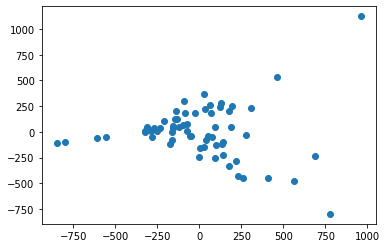

In [421]:
# график, потом можно раскрасить 
plt.scatter(new_axes[:, 0], new_axes[:, 1])